#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [3]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

### 1.Basic Data Exploration

In [6]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 148654
Number of columns: 13


In [8]:
#The data types of each column

df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [9]:
# Check for Nulls

df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

### 2.Descriptive Statistics

In [11]:
df['TotalPay'].mean()

74768.32197169267

In [13]:
df['TotalPay'].median()

71426.60999999999

In [17]:
df['TotalPay'].mode()[0]

0.0

In [18]:
df['TotalPay'].min()

-618.13

In [19]:
df['TotalPay'].max()

567595.43

* The range od the salries is between -618.13 (A negative salary value indicates a financial loss or a deduction rather than income) to 567595.43

In [24]:
df['TotalPay'].std()

50517.00527394987

### 3.Data Cleaning

In [25]:
null = df.isna().sum()
num_rows = 148654

print("EmployeeName:", np.round(null['EmployeeName'] / num_rows * 100), "%")
print("JobTitle:", np.round(null['JobTitle'] / num_rows * 100), "%")
print("BasePay:", np.round(null['BasePay'] / num_rows * 100), "%")
print("OvertimePay:", np.round(null['OvertimePay'] / num_rows * 100), "%")
print("OtherPay:", np.round(null['OtherPay'] / num_rows * 100), "%")
print("Benefits:", np.round(null['Benefits'] / num_rows * 100), "%")
print("TotalPay:", np.round(null['TotalPay'] / num_rows * 100), "%")
print("TotalPayBenefits:", np.round(null['TotalPayBenefits'] / num_rows * 100), "%")
print("Year:", np.round(null['Year'] / num_rows * 100), "%")
print("Notes:", np.round(null['Notes'] / num_rows * 100), "%")
print("Agency:", np.round(null['Agency'] / num_rows * 100), "%")
print("Status:", np.round(null['Status'] / num_rows * 100), "%")

EmployeeName: 0.0 %
JobTitle: 0.0 %
BasePay: 0.0 %
OvertimePay: 0.0 %
OtherPay: 0.0 %
Benefits: 24.0 %
TotalPay: 0.0 %
TotalPayBenefits: 0.0 %
Year: 0.0 %
Notes: 100.0 %
Agency: 0.0 %
Status: 100.0 %


* As the percentage of Notes and Status is very high and OvertimePay ,OtherPay is very small   -> Drop these columns.
* For Benefits it is 24% and BasePay,OvertimePay and OtherPay also very small -> replace it with the mean to keep the data and use it.

In [26]:
df.drop('Notes',axis=1,inplace=True)
df.drop('Status',axis=1,inplace=True)

In [27]:
df.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [30]:
df['BasePay']=df['BasePay'].fillna(df['BasePay'].mean())
df['Benefits']=df['Benefits'].fillna(df['Benefits'].mean())
df['OvertimePay']=df['OvertimePay'].fillna(df['OvertimePay'].mean())
df['OtherPay']=df['OtherPay'].fillna(df['OtherPay'].mean())


In [31]:
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

### 4.Basic Data Visualization

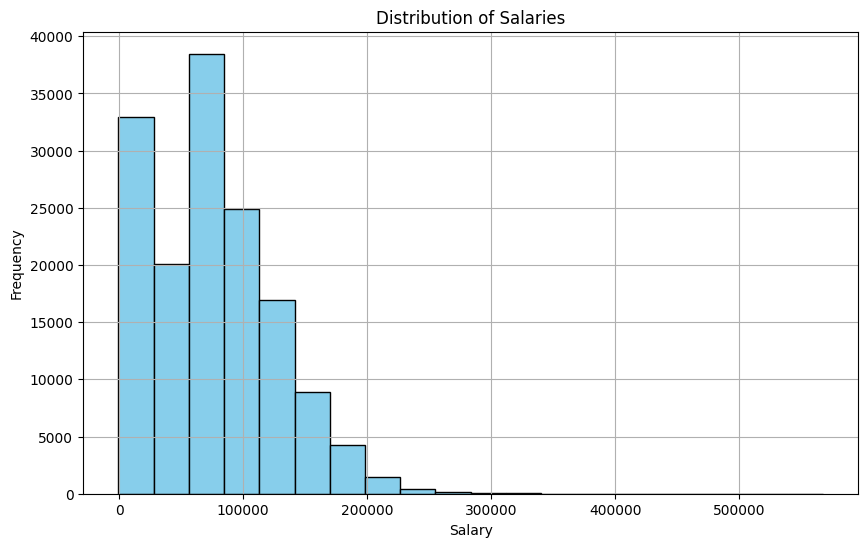

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [53]:
# Extract the department from the Job title column
def extract_department(job_title):
    if 'POLICE' in job_title or 'Inspector' in job_title:
        return 'Police'
    elif 'FIRE' in job_title or 'FIREFIGHTER' in job_title:
        return 'Fire'
    elif 'MEDICAL' in job_title or 'NURSING' in job_title or 'NURSE' in job_title or 'Health' in job_title:
        return 'Medical'
    else:
        return 'Not specified'


In [54]:
df['Department'] = df['JobTitle'].apply(extract_department)

In [55]:
df.head(15)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Department
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco,Not specified
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco,Police
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco,Police
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco,Not specified
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco,Fire
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,25007.893151,316285.74,316285.74,2011,San Francisco,Not specified
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,25007.893151,315981.05,315981.05,2011,San Francisco,Fire
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,25007.893151,307899.46,307899.46,2011,San Francisco,Not specified
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,25007.893151,303427.55,303427.55,2011,San Francisco,Fire
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,25007.893151,302377.73,302377.73,2011,San Francisco,Fire


Not specified    136759
Medical            6313
Police             4123
Fire               1459
Name: Department, dtype: int64


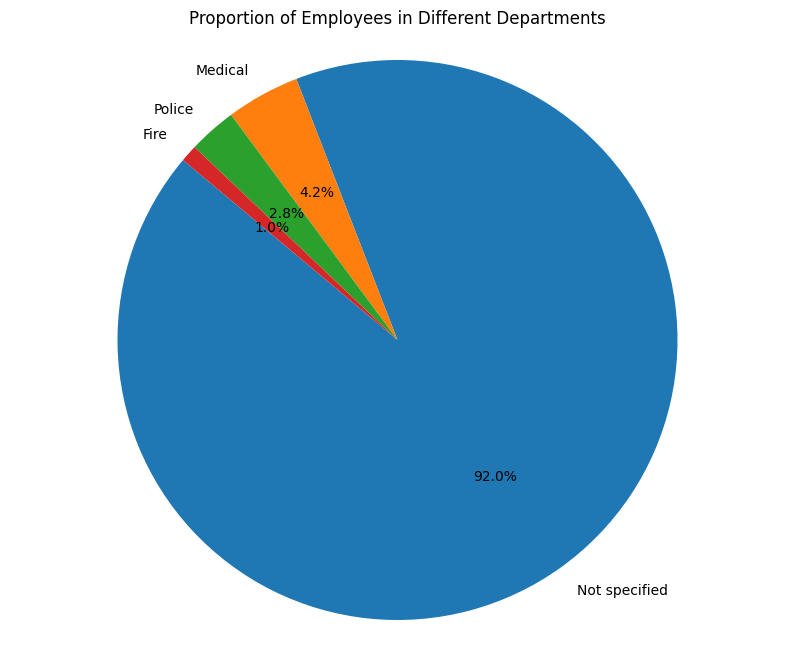

In [56]:
department_counts = df['Department'].value_counts()
print(df['Department'].value_counts())
plt.figure(figsize=(10, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.axis('equal')
plt.show()

### 5.Grouped Analysis

In [58]:
grouped = df.groupby('Department')

# Calculate summary statistics for each group
summary_stats = grouped.agg({
    'TotalPay': ['count', 'mean', 'median', 'min', 'max']
})

# Print summary statistics
print(summary_stats)

# Compare average salaries across different groups
average_salary_comparison = grouped['TotalPay'].mean()
print("\nAverage Salaries Across Different Groups:")
print(average_salary_comparison)

              TotalPay                                             
                 count           mean     median     min        max
Department                                                         
Fire              1459  145005.665483  144821.79    5.80  326373.19
Medical           6313   64441.491144   61089.60    0.00  278569.21
Not specified   136759   73168.348720   70337.05 -618.13  567595.43
Police            4123  118796.393946  120336.99    0.00  538909.28

Average Salaries Across Different Groups:
Department
Fire             145005.665483
Medical           64441.491144
Not specified     73168.348720
Police           118796.393946
Name: TotalPay, dtype: float64


### 6.Simple Correlation Analysis

<ipython-input-60-1d36ecd88c81>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


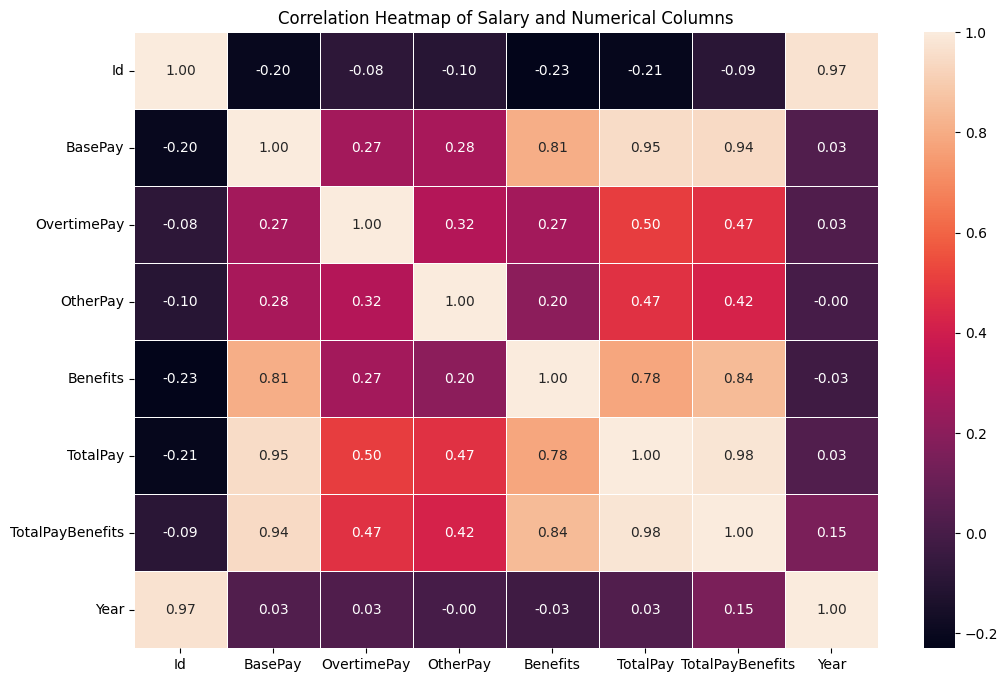

In [60]:
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Salary and Numerical Columns')
plt.show()

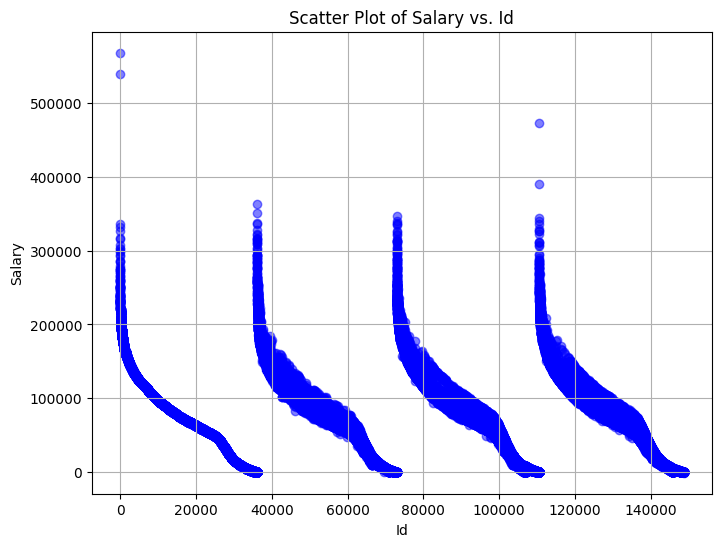

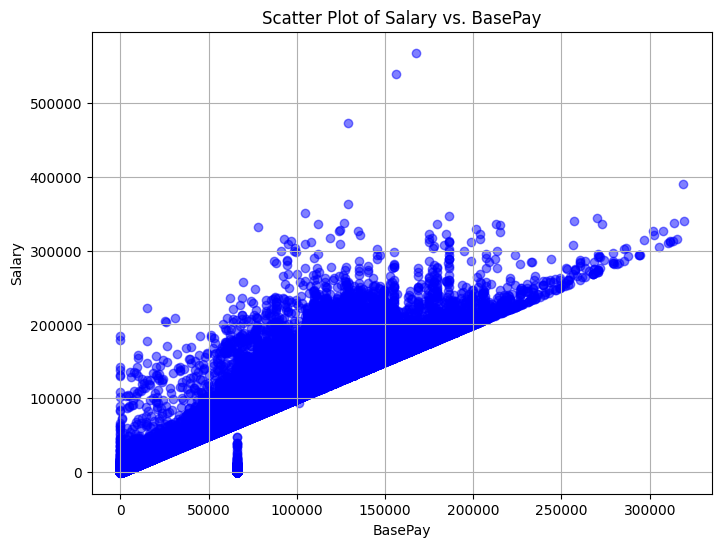

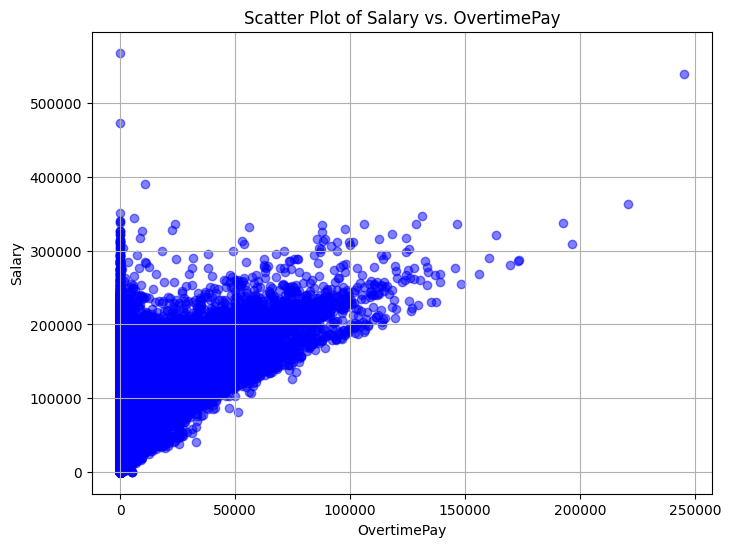

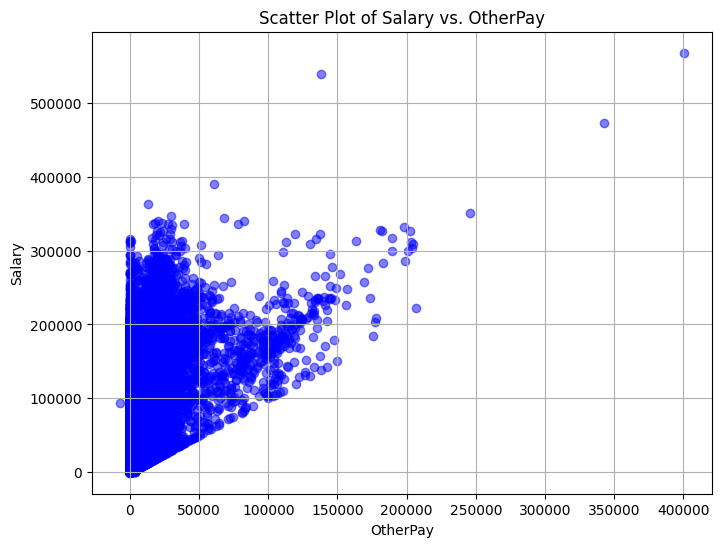

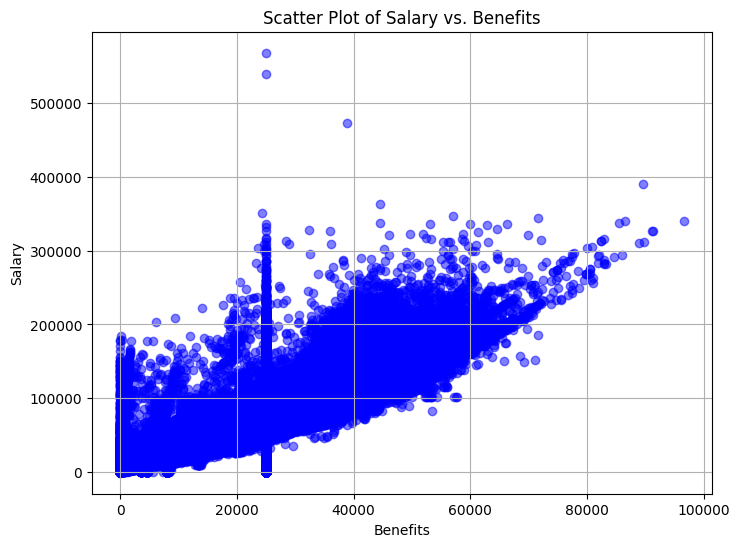

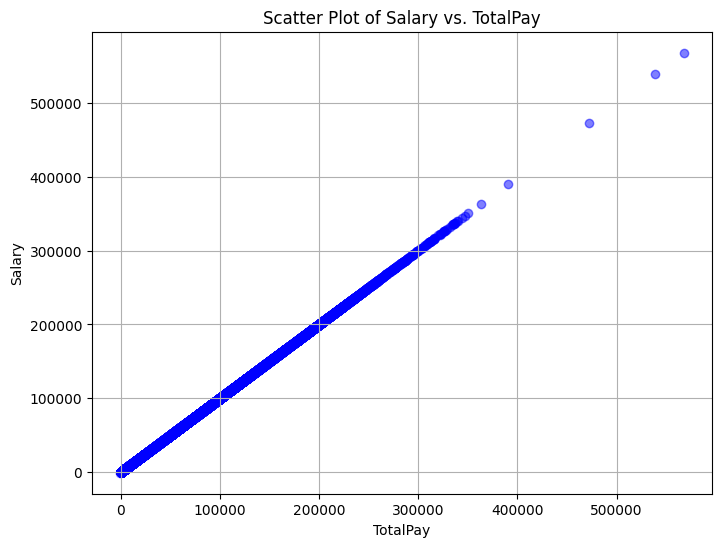

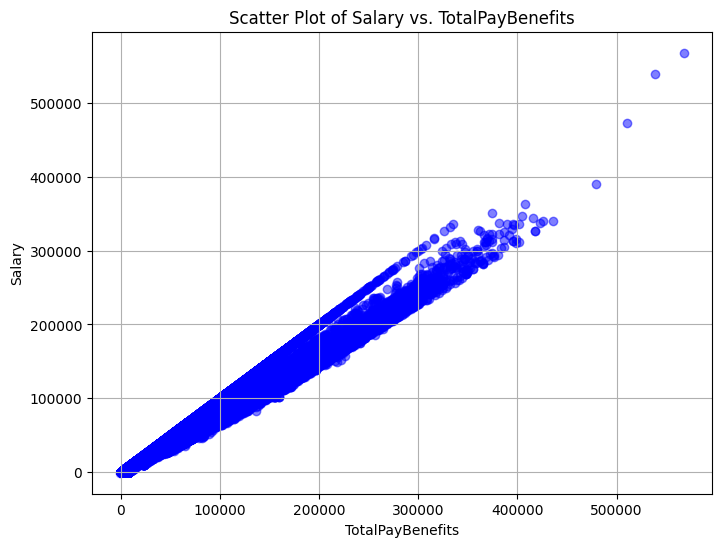

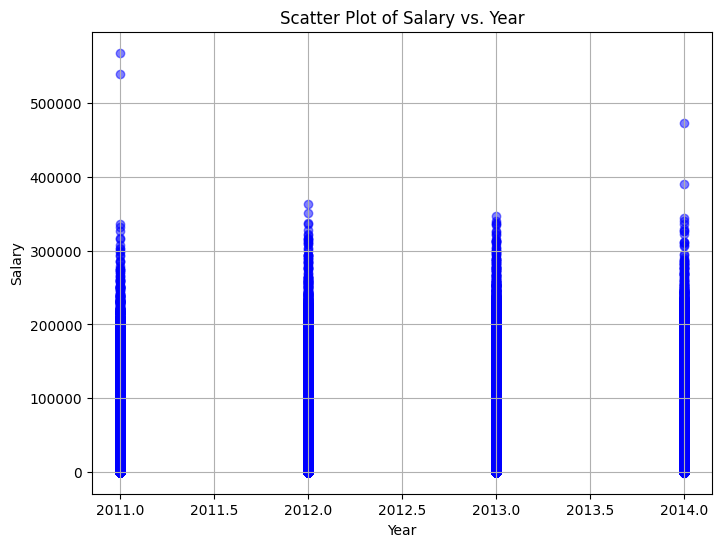

Correlation between Salary and Id: -0.21147793682787508
Correlation between Salary and BasePay: 0.9505142922626454
Correlation between Salary and OvertimePay: 0.5048439903995623
Correlation between Salary and OtherPay: 0.470482033829161
Correlation between Salary and Benefits: 0.7826870485384543
Correlation between Salary and TotalPay: 1.0
Correlation between Salary and TotalPayBenefits: 0.9773128522072129
Correlation between Salary and Year: 0.03209039798559024


In [61]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_dict = {}

for column in numerical_columns.columns:
    correlation = df['TotalPay'].corr(df[column])
    correlation_dict[column] = correlation

    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['TotalPay'], color='blue', alpha=0.5)
    plt.title(f'Scatter Plot of Salary vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Salary')
    plt.grid(True)
    plt.show()

for column, correlation in correlation_dict.items():
    print(f"Correlation between Salary and {column}: {correlation}")


### 7.Summary of Insights

* Through these analyses, we gain valuable insights into the distribution of salaries, the composition of the workforce across departments, factors influencing salary levels, and the relationships between salary and other variables.

* We found that the average of salaries is 74768 and there is a wide range startng from -ve values which means financial loss or a deduction to 567595.

* We found that the medical department have more employees than other departments.

* The fire department Average salaries is more than the other departments.

* The Salary Strongly related to BasePay, Benefits and TotalPayBenefits.

* The Salary slightly related to OvertimePay and OtherPay.


# Good Luck!